**1. Implement K-NN Classifier for classification of any dataset of your choice.
a. Load an existing data set
b. Split the data set to train and test sets
c. Test your model using test set. Find accuracy and confusion Matrix.
d. Examine the effect of the value of K on accuracy/performance. Plot the curve “k vs
accuracy” and find out the value of k for maximum accuracy for the test samples.**

In [3]:
import pandas as pd

df = pd.read_csv("drugdata.csv")
df

,Unnamed: 0,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,F,HIGH,HIGH,25.355,drugY
1,1,47,M,LOW,HIGH,13.093,drugC
2,2,47,M,LOW,HIGH,10.114,drugC
3,3,28,F,NORMAL,HIGH,7.798,drugX
4,4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...,...
195,195,56,F,LOW,HIGH,11.567,drugC
196,196,16,M,LOW,HIGH,12.006,drugC
197,197,52,M,NORMAL,HIGH,9.894,drugX
198,198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['Age'] = enc.fit_transform(df['Age'])
df['Sex'] = enc.fit_transform(df['Sex'])
df['BP'] = enc.fit_transform(df['BP'])
df['Cholesterol'] = enc.fit_transform(df['Cholesterol'])
df['Na_to_K'] = enc.fit_transform(df['Na_to_K'])
df['Drug'] = enc.fit_transform(df['Drug'])
df.head()

,Unnamed: 0,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,8,0,0,0,167,4
1,1,30,1,1,0,89,2
2,2,30,1,1,0,43,2
3,3,12,0,2,0,10,3
4,4,44,0,1,0,133,4


In [6]:
from sklearn.model_selection import train_test_split
x = df.drop('Drug',axis='columns')
y = df.Drug
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)
x_train_list = x_train.values.tolist()
x_test_list = x_test.values.tolist()
y_train_list = y_train.values.tolist()
y_test_list = y_test.values.tolist()

In [8]:
import numpy as np

class KNN:
    def __init__(self,k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = []
            for x_train in self.X_train:
                distance = np.sqrt(np.sum(np.square(np.array(x_train) - np.array(x))))
                distances.append(distance)

            # Get indices of k nearest neighbors
            nearest_indices = np.argsort(distances)[:self.k]

            # Get labels of k nearest neighbors
            nearest_labels = [self.y_train[i] for i in nearest_indices]

            # Predict the label based on majority vote
            prediction = max(set(nearest_labels), key=nearest_labels.count)
            predictions.append(prediction)

        return predictions
def calculate_accuracy(y_true, y_pred):
    correct = 0
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct += 1
    return correct / len(y_true)

def confusion_matrix(y_true, y_pred):
    unique_labels = np.unique(y_true)
    num_classes = len(unique_labels)
    matrix = np.zeros((num_classes, num_classes), dtype=int)

    label_to_index = {label: i for i, label in enumerate(unique_labels)}

    for true, pred in zip(y_true, y_pred):
        true_index = label_to_index[true]
        pred_index = label_to_index[pred]
        matrix[true_index, pred_index] += 1

    return matrix


# Create and train KNN classifier
k = int(input("Enter K Value: "))
clf = KNN(k)
clf.fit(x_train_list, y_train_list)
# Predict
predictions = clf.predict(x_test_list)

accuracy = calculate_accuracy(y_test_list,predictions)
matrix = confusion_matrix(y_test_list,predictions)
print("Predictions:", predictions)
print("Accuracy: ",accuracy)
print("Confusion Matrix: ")
print(matrix)

Enter K Value: 4
Predictions: [4, 0, 3, 4, 3, 3, 4, 4, 1, 3, 4, 0, 3, 0, 4, 0, 4, 3, 3, 4, 3, 0, 0, 3, 4, 0, 4, 4, 4, 4, 0, 3, 0, 0, 4, 3, 3, 3, 3, 4, 0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 3, 1, 3, 3, 4, 0, 4, 4, 3, 3, 3, 0, 4, 3, 3, 4, 4, 4, 4, 4, 4, 1, 4, 3, 3, 0, 3, 3, 0, 3]
Accuracy:  0.625
Confusion Matrix: 
[[ 4  0  0  5  0]
 [ 2  2  0  3  1]
 [ 3  0  0  5  0]
 [ 9  1  0 14  1]
 [ 0  0  0  0 30]]


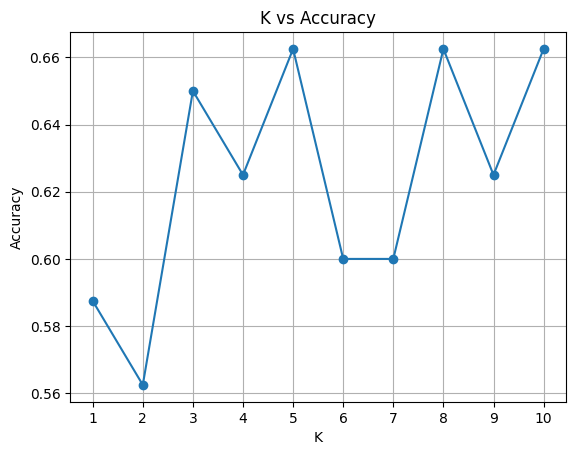

In [9]:
from matplotlib import pyplot as plt
max_k =10
k_values = range(1, max_k + 1)
accuracies = []
for k in range(1, max_k + 1):
    clf = KNN(k=k)
    clf.fit(x_train_list, y_train_list)
    predictions = clf.predict(x_test_list)
    accuracy = calculate_accuracy(y_test_list, predictions)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [10]:
max_accuracy = max(accuracies)
optimal_k = k_values[accuracies.index(max_accuracy)]
print("Maximum accuracy:", max_accuracy)
print("Optimal value of k for maximum accuracy:", optimal_k)

Maximum accuracy: 0.6625
Optimal value of k for maximum accuracy: 5
